# Exploring the neurobiological correlates of ENIGMA cortical thickness maps 

In [1]:
# general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch the ENIGMA example dataset

In [2]:
from nispace.datasets import fetch_example

enigma_data = fetch_example("enigma")

display(enigma_data.shape, enigma_data)

# ENIGMA data is only available in the DesikanKilliany parcellation
parc_name = "DesikanKilliany"

INFO | 17/06/24 11:23:58 | nispace: Loading example dataset: enigma
INFO | 17/06/24 11:23:58 | nispace: The enigma dataset was parcellated using the DesikanKilliany parcellation.


(13, 68)

,L_bankssts,L_caudalanteriorcingulate,L_caudalmiddlefrontal,L_cuneus,L_entorhinal,L_fusiform,L_inferiorparietal,L_inferiortemporal,L_isthmuscingulate,L_lateraloccipital,...,R_rostralanteriorcingulate,R_rostralmiddlefrontal,R_superiorfrontal,R_superiorparietal,R_superiortemporal,R_supramarginal,R_frontalpole,R_temporalpole,R_transversetemporal,R_insula
MDD,-0.058,-0.042,-0.014,0.047,-0.041,-0.117,-0.063,-0.049,-0.104,-0.023,...,-0.098,-0.038,-0.078,0.032,-0.031,-0.053,-0.062,0.013,-0.051,-0.115
PTSD,-0.100,-0.100,-0.120,-0.070,0.050,-0.060,-0.140,-0.070,-0.020,-0.150,...,0.010,-0.100,-0.120,-0.120,-0.140,-0.150,-0.100,-0.020,-0.050,-0.110
AN,-0.738,-0.065,-0.760,-0.663,0.060,-0.538,-0.895,-0.537,-0.620,-0.747,...,-0.003,-0.507,-0.722,-0.925,-0.522,-0.756,-0.332,-0.055,-0.258,-0.339
ADHD,0.000,-0.040,-0.050,0.020,-0.080,-0.100,0.010,-0.030,0.030,0.030,...,-0.010,0.000,0.000,0.010,0.000,-0.020,0.010,-0.120,0.010,-0.050
ASD,0.000,0.020,0.050,0.060,-0.150,NaN,0.010,-0.050,0.020,-0.010,...,0.090,0.220,0.200,-0.040,-0.050,-0.080,0.090,-0.150,-0.130,-0.100
OCD,-0.060,0.003,-0.090,-0.042,-0.062,-0.109,-0.140,-0.087,-0.068,-0.074,...,0.005,-0.091,-0.038,-0.047,0.014,0.003,0.021,0.015,-0.024,-0.065
BD,-0.207,-0.095,-0.266,-0.056,-0.036,-0.288,-0.265,-0.250,-0.132,-0.156,...,-0.087,-0.264,-0.256,-0.158,-0.194,-0.184,-0.102,-0.059,-0.109,-0.168
SCZ,-0.352,-0.119,-0.363,-0.203,-0.203,-0.491,-0.362,-0.449,-0.309,-0.331,...,-0.120,-0.313,-0.397,-0.219,-0.438,-0.386,-0.207,-0.236,-0.262,-0.406
22q11.2,-0.030,-0.210,0.510,0.520,0.160,0.190,0.250,0.280,0.300,0.220,...,0.160,0.800,0.530,0.300,-0.320,0.710,0.140,0.010,0.060,0.630
Epilepsy - all,-0.092,0.039,-0.319,-0.157,-0.264,-0.187,-0.197,-0.085,-0.049,-0.190,...,0.093,-0.197,-0.269,-0.313,-0.123,-0.223,-0.109,-0.181,-0.182,-0.022


## Fetch reference data

Note that the "BrainMap" dataset is currently not available, but will be in the future.

In [3]:
from nispace.datasets import fetch_reference
from nispace.utils import mean_by_set_df

ref_data = fetch_reference("brainmap", collection="AllDomainSets", parcellation=parc_name,
                           print_references=False)
ref_data_maps_pet_set = ref_data.index.get_level_values("set").value_counts(sort=False)

display(ref_data.shape, ref_data.head(5))
print(f"Between {ref_data_maps_pet_set.min()} and {ref_data_maps_pet_set.max()} maps per set")

# ref_data = mean_by_set_df(ref_data)
# display(ref_data.shape, ref_data.head(5))

INFO | 17/06/24 11:23:58 | nispace: Loading brainmap maps.
INFO | 17/06/24 11:23:58 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/brainmap/collection-AllDomainSets.json.
INFO | 17/06/24 11:23:58 | nispace: Loading parcellated data: DesikanKilliany
INFO | 17/06/24 11:23:58 | nispace: Standardizing parcellated data.


(41, 68)

1_LH_CX_bankssts  \
set    map                                                     
Action domain-Action.Observation_n-27               3.218532   
       domain-Action.Imagination_n-33               0.355414   
       domain-Action.Execution_n-237                0.273426   
       domain-Action.Execution.Speech_n-34          1.363481   
       domain-Action.Inhibition_n-80               -1.163773   

                                            2_LH_CX_caudalanteriorcingulate  \
set    map                                                                    
Action domain-Action.Observation_n-27                             -1.581726   
       domain-Action.Imagination_n-33                             -0.630253   
       domain-Action.Execution_n-237                              -0.275801   
       domain-Action.Execution.Speech_n-34                        -0.009861   
       domain-Action.Inhibition_n-80                               0.145724   

                                            3_LH_CX_caudalmiddlefrontal  \
set    map                                                                
Action domain-Action.Observation_n-27                          0.491979   
       domain-Action.Imagination_n-33                          1.544486   
       domain-Action.Execution_n-237                          -0.415494   
       domain-Action.Execution.Speech_n-34                    -0.610901   
       domain-Action.Inhibition_n-80                           1.140896   

                                            4_LH_CX_cuneus  \
set    map                                                   
Action domain-Action.Observation_n-27            -0.269847   
       domain-Action.Imagination_n-33            -0.625206   
       domain-Action.Execution_n-237             -0.095120   
       domain-Action.Execution.Speech_n-34       -0.506028   
       domain-Action.Inhibition_n-80              0.621392   

                                            5_LH_CX_entorhinal  \
set    map                                                       
Action domain-Action.Observation_n-27                -0.197126   
       domain-Action.Imagination_n-33                -0.955632   
       domain-Action.Execution_n-237                 -1.474966   
       domain-Action.Execution.Speech_n-34           -0.861927   
       domain-Action.Inhibition_n-80                 -1.611354   

                                            6_LH_CX_fusiform  \
set    map                                                     
Action domain-Action.Observation_n-27               0.335713   
       domain-Action.Imagination_n-33              -0.431806   
       domain-Action.Execution_n-237               -0.408589   
       domain-Action.Execution.Speech_n-34          0.682354   
       domain-Action.Inhibition_n-80               -1.352041   

                                            7_LH_CX_inferiorparietal  \
set    map                                                             
Action domain-Action.Observation_n-27                      -0.549065   
       domain-Action.Imagination_n-33                       0.622655   
       domain-Action.Execution_n-237                       -0.727174   
       domain-Action.Execution.Speech_n-34                 -1.002443   
       domain-Action.Inhibition_n-80                        0.698474   

                                            8_LH_CX_inferiortemporal  \
set    map                                                             
Action domain-Action.Observation_n-27                       0.368421   
       domain-Action.Imagination_n-33                      -0.519135   
       domain-Action.Execution_n-237                       -0.508411   
       domain-Action.Execution.Speech_n-34                  0.258642   
       domain-Action.Inhibition_n-80                       -0.302754   

                                            9_LH_CX_isthmuscingulate  \
set    map                                                             
Action domain-

Between 2 and 15 maps per set


## Test

In [92]:
from nispace import lgr
from nispace.workflows import simple_colocalization, simple_xsea

colocs, p_values, q_values = {}, {}, {}

# Overview analysis
colocs["mlr_by_set"], p_values["mlr_by_set"], q_values["mlr_by_set"], nsp = simple_xsea(
    x=ref_data,
    y=enigma_data,
    z=None,
    parcellation=parc_name,
    standardize="xyz",
    colocalization_method="mlr",
    permute_kwargs={"what": "maps", "maps_which": "X"},
    n_perm=10000,
    verbose=False,
    n_proc=-1,
    plot=False,
    seed=42
)   
print("p values < 0.05 for R2 values by set")
display(p_values["mlr_by_set"]["r2"] < 0.05)

# Single analysis
colocs["spearman"], p_values["spearman"], q_values["spearman"], nsp = simple_colocalization(
    x=ref_data,
    y=enigma_data,
    z=None,
    parcellation=parc_name,
    standardize="xyz",
    colocalization_method="spearman",
    n_perm=10000,
    verbose=False,
    n_proc=-1,
    plot=False,
    seed=42
)   
print("p values < 0.05 for Spearman correlation")
display(p_values["spearman"] < 0.05)

p values < 0.05 for R2 values by set


,Action,Perception,Interoception,Emotion,Cognition
MDD,False,False,False,False,False
PTSD,False,False,False,False,False
AN,False,True,False,False,False
ADHD,False,False,False,False,False
ASD,False,False,False,False,True
OCD,False,False,False,False,False
BD,False,False,False,False,False
SCZ,False,False,False,False,False
22q11.2,False,False,False,False,False
Epilepsy - all,False,False,False,False,False


p values < 0.05 for Spearman correlation


set                                            Action  \
map                    domain-Action.Observation_n-27   
MDD                                             False   
PTSD                                            False   
AN                                              False   
ADHD                                            False   
ASD                                             False   
OCD                                             False   
BD                                              False   
SCZ                                             False   
22q11.2                                         False   
Epilepsy - all                                  False   
Epilepsy - temporal                              True   
Epilepsy - generalized                          False   
PD                                               True   

set                                                    \
map                    domain-Action.Imagination_n-33   
MDD                                             False   
PTSD                                            False   
AN                                              False   
ADHD                                            False   
ASD                                             False   
OCD                                             False   
BD                                              False   
SCZ                                             False   
22q11.2                                         False   
Epilepsy - all                                   True   
Epilepsy - temporal                             False   
Epilepsy - generalized                          False   
PD                                              False   

set                                                   \
map                    domain-Action.Execution_n-237   
MDD                                            False   
PTSD                                           False   
AN                                             False   
ADHD                                           False   
ASD                                            False   
OCD                                             True   
BD                                             False   
SCZ                                            False   
22q11.2                                        False   
Epilepsy - all                                 False   
Epilepsy - temporal                            False   
Epilepsy - generalized                         False   
PD                                             False   

set                                                         \
map                    domain-Action.Execution.Speech_n-34   
MDD                                                  False   
PTSD                                                 False   
AN                                                   False   
ADHD                                                 False   
ASD                                                  False   
OCD                                                  False   
BD                                                   False   
SCZ                                                  False   
22q11.2                                              False   
Epilepsy - all                                       False   
Epilepsy - temporal                                  False   
Epilepsy - generalized                               False   
PD                                                   False   

set                                                   \
map                    domain-Action.Inhibition_n-80   
MDD                                            False   
PTSD                                           False   
AN                                             False   
ADHD                                           False   
ASD                                             True   
OCD                                             True   
BD                                             False   
SCZ         

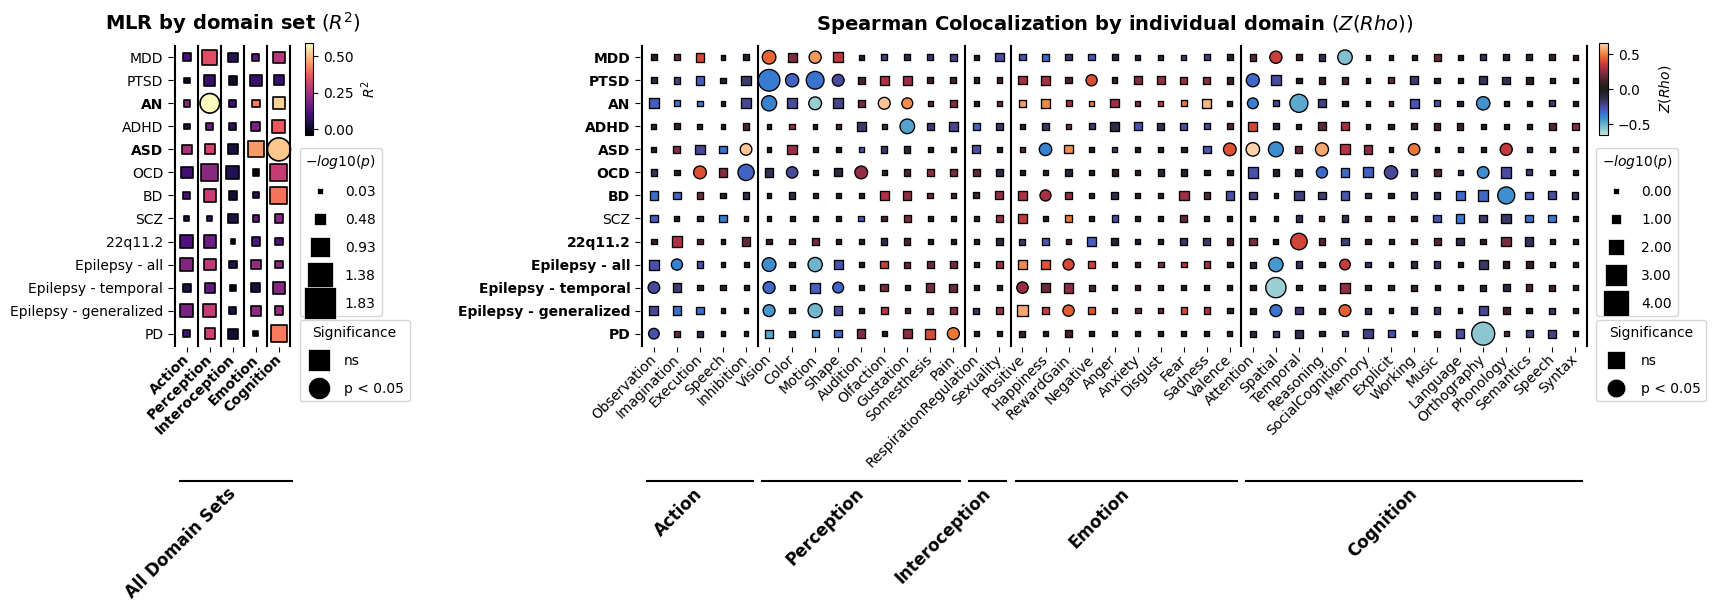

In [91]:
from nispace.plotting import heatmap
from nispace.plotting import print_significance

fig, axes = plt.subplots(1,2, figsize=(18,6), gridspec_kw={"width_ratios": [0.15, 1]}, 
                         constrained_layout=True)

for i, (analysis, stat, title) in enumerate([
    ("mlr_by_set", "r2", "MLR by domain set $(R^2)$"), 
    ("spearman", "rho", "Spearman Colocalization by individual domain $(Z(Rho))$"), 
]):

    coloc_df = colocs[analysis][stat] if stat=="r2" else colocs[analysis]
    p_df = p_values[analysis][stat] if stat=="r2" else p_values[analysis]
    q_df = q_values[analysis][stat] if stat=="r2" else q_values[analysis]

    significance_shapes = coloc_df.copy().astype(str)
    significance_shapes.iloc[:] = "ns"
    significance_shapes = np.where(p_df < 0.05, "p < 0.05", significance_shapes)
    significance_shapes = np.where(q_df < 0.05, "q < 0.05", significance_shapes)

    axes[i].set_title(title, fontsize=14, fontweight="semibold", pad=10)
    heatmap(
        ax=axes[i],
        data_colors=coloc_df,
        data_sizes=-np.log10(p_df),
        data_shapes=significance_shapes,
        spines=None,
        symmetric_cmap=True if stat=="rho" else False,
        linewidth=0.05,
        ytick_labels=coloc_df.index,
        legend_colors_kwargs={
            "label": "$Beta$" if "Beta" in title else "$Z(Rho)$" if "Z(Rho)" in title else "$R^2$",
            "cax": axes[i].inset_axes((1.1, 0.7, 0.07, 0.3) if stat=="r2" else (1.01, 0.7, 0.01, 0.3))
        },
        legend_sizes_kwargs={
            "title": "$-log10(p)$",
            "bbox_to_anchor": (1, 0.38)
        },
        legend_shapes_kwargs={
            "title": "Significance",
            "bbox_to_anchor": (1, -0.2)
        },   
    )
    
    axes[i].set_xticks(
        np.arange(len(coloc_df.columns)),
        labels=coloc_df.columns if stat=="r2" \
            else [c[1].split("_")[0].split("-")[1].split(".")[-1] for c in coloc_df.columns],
        rotation=45,
        weight="semibold" if stat=="r2" else "normal"
    )
    
    ax = axes[i].inset_axes((0, -0.65, 1, 0.22))
    ax.set_xlim(axes[i].get_xlim())
    ax.set_ylim(0, 1.05)
    ax.set_axis_off()
    x = 0
    if stat=="rho":
        for set_name, set_size in ref_data_maps_pet_set.items():
            axes[i].plot((x-0.5, x-0.5), (-0.5, 13), color="k", linestyle="-")
            ax.plot((x-0.3, x+set_size-1+0.3), (1, 1), color="k", linestyle="-")
            ax.text(x+((set_size-1)/2), 0.85, set_name, ha="right", va="center", 
                    rotation=45, rotation_mode="anchor", fontsize=12, fontweight="semibold")
            x += set_size 
        axes[i].plot((x-0.5, x-0.5), (-0.5, 13), color="k", linestyle="-")
    else:
        for x in range(len(coloc_df.columns)):
            axes[i].plot((x-0.5, x-0.5), (-0.5, 13), color="k", linestyle="-")
        ax.plot((-0.3, 5+0.3), (1, 1), color="k", linestyle="-")
        axes[i].plot((x+0.5, x+0.5), (-0.5, 13), color="k", linestyle="-")
        ax.text(2, 0.85, "All Domain Sets", ha="right", va="center", 
                rotation=45, rotation_mode="anchor", fontsize=12, fontweight="semibold")
        
    print_significance(axes[i], p_values=p_df.min(axis=1))

fig.savefig("enigma_plot_behavior.pdf", bbox_inches="tight")

## Run analysis with workflow function

In [18]:
# from nispace import lgr
# from nispace.workflows import simple_colocalization

# colocs, p_values, q_values, nsp = simple_colocalization(
#     x=ref_data,
#     y=enigma_data,
#     z=None,
#     parcellation=parc_name,
#     standardize="x",
#     colocalization_method=["spearman", "pearson", "slr", "mlr", "ridge", "pls"],
#     colocalize_kwargs={"n_components": 5},
#     n_perm=1000,
#     verbose=False,
#     n_proc=-1,
#     plot=False,
#     seed=42
# )

## Plot results

In [19]:
# from nispace.plotting import heatmap
# from nispace.plotting import print_significance

# fig, axes = plt.subplots(3,2, figsize=(21, 15), constrained_layout=True)
# axes = axes.ravel(order="F")

# for i, (method, stat, title) in enumerate([
#     ("spearman", "rho", "Spearman Correlation ($Z(Rho)$)"), 
#     ("pearson", "rho", "Pearson Correlation ($Z(Rho)$)"), 
#     ("slr", "r2", "Simple Linear Regression ($R^2$)"), 
#     ("mlr", "beta", "Multiple Linear Regression ($Beta$)"), 
#     ("ridge", "beta", "Ridge Regression (distance-dependent cross-validation; $Beta$)"),
#     ("pls", "beta", "Partial Least Squares Regression (5 components; $Beta$)")
# ]):
        
#     coloc_df = colocs[method][stat] if "beta" in stat else colocs[method]
#     p_df = p_values[method][stat] if "beta" in stat else p_values[method]
#     q_df = q_values[method][stat] if "beta" in stat else q_values[method]

#     significance_shapes = coloc_df.copy().astype(str)
#     significance_shapes.iloc[:] = "ns"
#     significance_shapes = np.where(p_df < 0.05, "p < 0.05", significance_shapes)
#     #significance_shapes = np.where(q_df < 0.05, "q < 0.05", significance_shapes)

#     axes[i].set_title(title, fontsize=14, fontweight="semibold", pad=10)

#     heatmap(
#         ax=axes[i],
#         data_colors=coloc_df,
#         data_sizes=-np.log10(p_df),
#         data_shapes=significance_shapes,
#         spines=None,
#         symmetric_cmap=True if method!="slr" else False,
#         linewidth=0.05,
#         ytick_labels=coloc_df.index,
#         legend_colors_kwargs={
#             "label": "$Beta$" if "Beta" in title else "$Z(Rho)$" if "Z(Rho)" in title else "$R^2$",
#             "cax": axes[i].inset_axes((1.04, 0.7, 0.03, 0.3))
#         },
#         legend_sizes_kwargs={
#             "title": "$-log10(p)$",
#             "bbox_to_anchor": (1, 0.43)
#         },
#         legend_shapes_kwargs={
#             "title": "Significance",
#             "bbox_to_anchor": (1, -0.1)
#         },   
#     )
    
#     axes[i].set_xticks(
#         np.arange(len(coloc_df.columns)),
#         labels=[c[1].split("_")[0].split("-")[1] for c in coloc_df.columns],
#         rotation=45
#     )
    
#     x = 0
#     for set_name, set_size in ref_data_maps_pet_set.items():
#         axes[i].plot((x-0.5, x-0.5), (-0.5, 13), color="k", linestyle="-")
        
#         if axes[i].get_subplotspec().is_last_row():
#             ax = axes[i].inset_axes((0, -0.4, 1, 0.22))
#             ax.set_xlim(axes[i].get_xlim())
#             ax.set_ylim(0, 1.05)
#             ax.set_axis_off()
#             ax.plot((x-0.3, x+set_size-1+0.3), (1, 1), color="k", linestyle="-")
#             ax.text(x+((set_size-1)/2), 0.85, set_name, ha="right", va="center", 
#                     rotation=45, rotation_mode="anchor", fontsize=12, fontweight="semibold")
        
#         x += set_size 
#     axes[i].plot((x-0.5, x-0.5), (-0.5, 13), color="k", linestyle="-")
        
#     print_significance(axes[i], p_values=p_df.min(axis=1))

# # save
# fig.savefig("enigma_plot_comparison.pdf", bbox_inches="tight")